# 数据清理与分析：推特用户WeRateDogs对宠物狗的评分
## 1 收集

### 1.1 导入库

In [1]:
# 在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

/bin/sh: wget: command not found


In [2]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import os
import glob
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#### 设置Dataframe显示方式

In [3]:
# 显示所有行与列
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 200)

### 1.2 收集数据 

In [4]:
# 收集文件 twitter_archive_enhanced.csv 保存为 dataframe
tae_df = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')

In [5]:
# 收集文件 image-predictions.tsv 保存为 dataframe
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
file_name = 'image-predictions.tsv'
open(file_name, 'wb').write(response.content)
img_predt_df = pd.read_csv('image-predictions.tsv', sep = '\s+')

In [6]:
# 收集文件 tweet_json.txt 保存为 dataframe
tweet_df = pd.read_json('tweet_json.txt', lines = True)

## 2 评估
### 2.1 评估数据集 `twitter_archive_enhanced.csv`
#### 2.1.1 目测评估

In [7]:
# 目测评估数据集 twitter_archive_enhanced.csv
tae_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


根据数据集介绍与目测数据，解释数据中变量的含义：
```
tweet_id：是推特链接的最后一部分，位于 "status/" 后面，https://twitter.com/dog_rates/status/889531135344209921。
in_reply_to_status_id：回复id。
in_reply_to_user_id：回复用户id。
timestamp：时间戳，推测是用户发表推特动态的时间。
source：暂不了解此变量的含义。
text：对狗的描述，包含宠物狗简评、评分、推特评论网址。
retweeted_status_id：转发id。
retweeted_status_user_id：转发用户id。
retweeted_status_timestamp：转发时间戳。
expanded_urls：扩展网址，其显示内容与text中推特评论网址显示的内容一致。
rating_numerator：评级分子。
rating_denominator：评级分母。
name：宠物狗名字。
doggo：中型犬。
floofer：大型犬。
pupper：小型犬。
puppo：暂不了解此变量的含义。
```
> 提示：通过 [这部视频](https://www.youtube.com/watch?reload=9&v=ah6fmNEtXFI)(需翻墙）了解到doggo、floofer、pupper为描述狗体型的单词，其中体型由大到小排列为 floofer、doggo、pupper。

#### 2.1.2 根据目测评估提出问题
```
问题：哪种体型的宠物狗最受欢迎？
```

#### 2.1.3 编程评估

In [8]:
# 编程评估数据集 twitter_archive_enhanced.csv
# 数据集的行数、列数
tae_df.shape

(2356, 17)

In [9]:
# 数据集描述信息
tae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# 查看数据集空值情况
tae_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
# 查看是否存在重复数据的情况
tae_df.duplicated().sum()

0

In [12]:
# 查看 rating_denominator 列中相同数据出现的频率
tae_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
# 查看 name 列中相同数据出现的频率
tae_df.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Penny              10
Tucker             10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Buddy               7
Bailey              7
Daisy               7
Toby                7
an                  7
Stanley             6
Jack                6
Leo                 6
Dave                6
Milo                6
Jax                 6
Oscar               6
Koda                6
Bella               6
Rusty               6
Scout               6
Phil                5
Sunny               5
Chester             5
Oakley              5
very                5
Bentley             5
Gus                 5
Sammy               5
Larry               5
Finn                5
Louis               5
George              5
Alfie               5
Riley               4
Cassie              4
Bear                4
Maggie    

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

In [14]:
# 查看 doggo 列中相同数据出现的频率
tae_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
# 查看 floofer 列中相同数据出现的频率
tae_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
# 查看 pupper 列中相同数据出现的频率
tae_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
# 查看 puppo 列中相同数据出现的频率
tae_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### 2.2 评估数据集`image-predictions.tsv`
#### 2.2.1 目测评估

In [18]:
# 目测评估数据集 image-predictions.tsv
img_predt_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


根据课程中“项目动机”对数据集的描述，解释数据中变量的含义：
```
tweet_id：是推特链接的最后一部分，位于 "status/" 后面，https://twitter.com/dog_rates/status/889531135344209921。
jpg_url：是预测的图像资源链接
img_num：最可信的预测结果对应的图像编号
p1：是算法对推特中图片的一号预测
p1_conf：是算法的一号预测的可信度
p1_dog：是一号预测该图片是否属于“狗”（有可能是其他物种，比如熊、马等）
p2：是算法对推特中图片预测的第二种可能性
p2_conf：是算法的二号预测的可信度
p2_dog：是二号预测该图片是否属于“狗”
p3：是算法对推特中图片预测的第三种可能性
p3_conf：是算法的三号预测的可信度
p3_dog：是三号预测该图片是否属于“狗”
```

#### 2.2.2 根据目测评估提出问题
```
问题：哪种品种的宠物狗获得较高评分？
```

#### 2.2.3 编程评估数据集`image-predictions.tsv`

In [19]:
# 数据集的行数、列数
img_predt_df.shape

(2075, 12)

In [20]:
# 数据集描述信息
img_predt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# 查看数据集空值情况
img_predt_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
# 查看是否存在重复数据的情况
img_predt_df.duplicated().sum()

0

In [23]:
# 查看 img_num 列中相同数据出现的频率
img_predt_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### 2.3 评估数据集 `tweet_json.txt`
#### 2.3.1 目测评估

In [24]:
# 目测评估数据集 tweet_json.txt
tweet_df.tail(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2347,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ...",NaN,NaN,None,NaN,False,41,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2348,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ...",NaN,NaN,None,NaN,False,147,309,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2349,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ...",NaN,NaN,None,NaN,False,47,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/med

根据数据集内容，解释数据中变量的含义：
```
created_at：动态创建时间。
id：推特id。
id_str：推特id。
full_text：动态文字内容，包含推特动态网址。
truncated：翻译为截断，暂不了解此变量的含义。
display_text_range：动态的字数。
entities：实体，从内容上看是推特动态资源信息的描述。
extended_entities：扩展实体，暂不了解此变量的含义。
in_reply_to_status_id：回复id。
in_reply_to_status_id_str：回复id。
in_reply_to_user_id：回复用户id。
in_reply_to_user_id_str：回复用户id。
in_reply_to_screen_name：暂不了解此变量的含义。
user：推特用户信息。
geo：暂不了解此变量的具体含义。
coordinates：坐标。
place：地点。
contributors：贡献者，暂不了解此变量的具体含义。
is_quote_status：暂不了解此变量的具体含义。
retweet_count：推特转发数。
favorite_count：喜欢数量。
favorited：喜欢。
retweeted：转推。
possibly_sensitive：暂不了解此变量的具体含义。
possibly_sensitive_appealable：暂不了解此变量的具体含义。
lang：发推所用语言。
retweeted_status：转发状态。
quoted_status_id：引用状态id。
quoted_status_id_str：引用状态id。
quoted_status：引用状态。
```

#### 2.3.2 根据目测数据集`tweet_json.txt`提出问题
```
问题：宠物狗推特转发量和喜爱量之间的关系
```

#### 2.3.3 编程评估数据集`image-predictions.tsv`

In [25]:
# 数据集的行数、列数
tweet_df.shape

(2352, 31)

In [26]:
# 数据集描述信息
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
created_at                       2352 non-null datetime64[ns, UTC]
id                               2352 non-null int64
id_str                           2352 non-null int64
full_text                        2352 non-null object
truncated                        2352 non-null bool
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
source                           2352 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2352 non-null object
geo                              0 non-null float64
coordinates                 

In [27]:
# 查看数据集空值情况
tweet_df.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 279
source                              0
in_reply_to_status_id            2274
in_reply_to_status_id_str        2274
in_reply_to_user_id              2274
in_reply_to_user_id_str          2274
in_reply_to_screen_name          2274
user                                0
geo                              2352
coordinates                      2352
place                            2351
contributors                     2352
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                141
possibly_sensitive_appealable     141
lang        

### 2.4 数据分析问题汇总
#### 2.4.1 探索性数据分析问题汇总
根据对数据集的理解，汇总以下问题进行探索性数据分析
```
1.哪种体型的宠物狗最受欢迎？
2.哪种品种的宠物狗获得较高评分？
3.宠物狗推特转发量和喜爱量之间的关系
```
#### 2.4.2 数据集出现的问题
##### 2.4.2.1 twitter_archive_enhanced.csv
质量问题
```
1.删除与EDA无关的列。
2.清理转发数据。
3.删除评分有问题的值。
4.id变量转换为str类型（id变量为主键，转变为str类型更有意义）。
5.name中将‘None’转变为空值。
6.doggo、floofer、pupper、puppo中将‘None’转变为空值。
```
整洁度问题
```
doggo、floofer、pupper、puppo均为描述狗体型的变量，属于一类，应单独为一列。
```
##### 2.4.2.2 image-predictions.tsv
质量问题
```
1.狗种类名称大小写不统一。
2.清理图片预测不是宠物狗的数据。
```
整洁度问题
```
EDA应在一个表格中进行，以twitter_archive_enhanced.csv作为主数据，tweet_id为主键，将p1、p1_conf、p1_dog三列插入其中。
```
##### 2.4.2.3 tweet_json.txt
质量问题
```
‘display_text_range’为列表类型，描述推特动态的字数范围，应将右侧最大值保留，转为int类型。
```
整洁度问题
```
EDA应在一个表格中进行，以twitter_archive_enhanced.csv作为主数据，tweet_id为主键，将retweet_count、favorite_count两列插入其中。
```

## 3 清理数据
### 3.1 备份数据

In [28]:
tae_df_clean = tae_df.copy()
img_predt_df_clean = img_predt_df.copy()
tweet_df_clean = tweet_df.copy()

### 3.2 清理质量问题

#### 3.2.1 Q1-清理评分数据

In [29]:
# 观察rating_numerator、rating_denominator中的问题数据
# 根据数据集描述，rating_denominator的值应该为10，rating_numerator的值在0~20之间
tae_df_clean.query('rating_denominator != 10 | rating_numerator > 20 | rating_numerator < 0')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [30]:
df_test = tae_df_clean.query('rating_denominator != 10 | rating_numerator > 20 | rating_numerator < 0')[['text','rating_numerator','rating_denominator']]
df_test.shape

(32, 3)

根据之前的数据评估，此数据集共有2356行数据，异常数据32行，占1.358%，可删除评分异常数据。

In [31]:
# 删除评分异常数据
tae_df_clean = tae_df_clean.query('rating_denominator == 10 | 0 <= rating_numerator <= 20')
# 核验删除异常数据后的数据集
tae_df_clean.shape

(2341, 17)

#### 3.2.2 Q2-将id列转换字符串类型
将所有数据集id列转换为str类型，有助于之后的数据合并，另外id在数据集中的含义是编号，转化为字符串类型更有意义。

In [32]:
# 将所有数据集ID列转换为字符串类型
tae_df_clean.tweet_id = tae_df_clean['tweet_id'].astype(str)
img_predt_df_clean.tweet_id = img_predt_df_clean['tweet_id'].astype(str)
tweet_df_clean.id = tweet_df_clean['id'].astype(str)

In [33]:
# 查看转换后的数据集
tae_df_clean.tweet_id[:5]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [34]:
img_predt_df_clean.tweet_id[:5]

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object

In [35]:
tweet_df_clean.id[:5]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id, dtype: object

#### 3.2.3 Q3-处理 tweet_json.txt数据集中`display_text_range`列
‘display_text_range’为列表类型，描述推特动态的字数范围，EDA实际需要推特动态的字数。

处理方案：保留列表中右侧的最大值，转为int类型。

In [36]:
# 目测数据更改前的状态
tweet_df_clean.display_text_range[-10:]

2342    [0, 135]
2343    [0, 124]
2344    [0, 140]
2345    [0, 138]
2346    [0, 140]
2347    [0, 120]
2348    [0, 137]
2349    [0, 130]
2350    [0, 139]
2351    [0, 131]
Name: display_text_range, dtype: object

In [37]:
# 提取右侧最大值
tweet_df_clean.display_text_range = tweet_df_clean.display_text_range.str[1].astype(int)
# 目测数据更改后的状态
tweet_df_clean.display_text_range[-10:]

2342    135
2343    124
2344    140
2345    138
2346    140
2347    120
2348    137
2349    130
2350    139
2351    131
Name: display_text_range, dtype: int64

#### 3.2.4 Q4-狗名字中的‘None’变量转变为空值

In [38]:
# 查看原始数据状态
tae_df_clean['name'].value_counts()

None              734
a                  54
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Lola               10
Penny              10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Buddy               7
an                  7
Bailey              7
Toby                7
Daisy               7
Koda                6
Stanley             6
Scout               6
Oscar               6
Jack                6
Milo                6
Bella               6
Jax                 6
Leo                 6
Dave                6
Rusty               6
Oakley              5
Phil                5
very                5
Chester             5
Sunny               5
Sammy               5
Bentley             5
Finn                5
George              5
Louis               5
Gus                 5
Alfie               5
Larry               5
Jeffrey             4
one                 4
Shadow              4
Maggie    

In [39]:
tae_df_clean['name'].isnull().sum()

0

狗名字中的None为变量，从常识来看此变量在此处的含义为“未填写狗姓名”，EDA实际需要将其改为空值。

In [40]:
# 将None替换为空值
tae_df_clean['name'].replace('None', np.nan, inplace = True)
# 查看数据更改后的状态
tae_df_clean['name'].isnull().sum()

734

In [41]:
tae_df_clean['name'].value_counts()

a                 54
Charlie           12
Lucy              11
Oliver            11
Cooper            11
Lola              10
Penny             10
Tucker            10
Bo                 9
Winston            9
the                8
Sadie              8
Bailey             7
Daisy              7
Buddy              7
an                 7
Toby               7
Oscar              6
Stanley            6
Bella              6
Jack               6
Dave               6
Milo               6
Leo                6
Scout              6
Koda               6
Jax                6
Rusty              6
Phil               5
Larry              5
Gus                5
Chester            5
Sunny              5
George             5
Oakley             5
Bentley            5
Sammy              5
Alfie              5
very               5
Louis              5
Finn               5
Reggie             4
Scooter            4
Jerry              4
quite              4
Riley              4
Maggie             4
Moose        

#### 3.2.5 Q5-狗名字变量中大小写不统一且小写姓名不符合取名常识
主数据集中的name列，包含一些小写的值，例如a, an, the, his等 
处理方案：将所有的小写狗名改为空值

In [42]:
# 查看原始数据状态
tae_df_clean['name'].value_counts()

a                 54
Charlie           12
Lucy              11
Oliver            11
Cooper            11
Lola              10
Penny             10
Tucker            10
Bo                 9
Winston            9
the                8
Sadie              8
Bailey             7
Daisy              7
Buddy              7
an                 7
Toby               7
Oscar              6
Stanley            6
Bella              6
Jack               6
Dave               6
Milo               6
Leo                6
Scout              6
Koda               6
Jax                6
Rusty              6
Phil               5
Larry              5
Gus                5
Chester            5
Sunny              5
George             5
Oakley             5
Bentley            5
Sammy              5
Alfie              5
very               5
Louis              5
Finn               5
Reggie             4
Scooter            4
Jerry              4
quite              4
Riley              4
Maggie             4
Moose        

In [43]:
# 将小写狗名修改为空值
# 由于清理后的数据集中有空值，改小写时会报错，使用数据源作为查找小写狗名的索引
null = (tae_df.name.str.islower())
tae_df_clean.loc[null, 'name'] = np.nan


# 查看数据更改后的状态
tae_df_clean['name'].isnull().sum()

841

In [44]:
# 目测数据集更新后的状态
tae_df_clean['name'].value_counts()

Charlie           12
Lucy              11
Oliver            11
Cooper            11
Lola              10
Penny             10
Tucker            10
Winston            9
Bo                 9
Sadie              8
Buddy              7
Bailey             7
Toby               7
Daisy              7
Dave               6
Leo                6
Scout              6
Bella              6
Milo               6
Jack               6
Oscar              6
Rusty              6
Koda               6
Stanley            6
Jax                6
Louis              5
Larry              5
Bentley            5
Alfie              5
Sammy              5
Sunny              5
Phil               5
Gus                5
Oakley             5
George             5
Finn               5
Chester            5
Jeffrey            4
Hank               4
Jerry              4
Scooter            4
Bruce              4
Sampson            4
Moose              4
Riley              4
Maggie             4
Reginald           4
Reggie       

#### 3.2.6 Q6-狗种类名称大小写不一致
image-predictions.tsv数据集中的p1列，存在大小写不一致的情况，猜测改为小写后也许有重复项

In [45]:
# 查看原始数据状态
img_predt_df_clean.p1[-10:]

2065                    Pembroke
2066               Irish_terrier
2067                  Pomeranian
2068                 Appenzeller
2069    Chesapeake_Bay_retriever
2070                      basset
2071                 paper_towel
2072                   Chihuahua
2073                   Chihuahua
2074                      orange
Name: p1, dtype: object

In [46]:
img_predt_df_clean.p1.value_counts().count()

378

使用.str.lower方法将其大写全部改为小写

In [47]:
img_predt_df_clean.p1 = img_predt_df_clean.p1.str.lower()
# 观察修改后的数据集
img_predt_df_clean.p1[-10:]

2065                    pembroke
2066               irish_terrier
2067                  pomeranian
2068                 appenzeller
2069    chesapeake_bay_retriever
2070                      basset
2071                 paper_towel
2072                   chihuahua
2073                   chihuahua
2074                      orange
Name: p1, dtype: object

In [48]:
img_predt_df_clean.p1.value_counts().count()

378

p1改为小写后，分类依然有378个，没有发生变化，猜测在给狗种类命名时没有规范，导致种类繁多。

#### 3.2.7 Q7-清理图片预测不是宠物狗的数据。
image-predictions.tsv数据集中的p1_dog列，存在值为False的情况，需要删除图片预测不是宠物狗的数据。

In [49]:
# 查看原始数据状态
img_predt_df_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [50]:
# 删除图片预测不是宠物狗的数据
img_predt_df_clean = img_predt_df_clean.query('p1_dog == True')
# 核验删除异常数据后的数据集
img_predt_df_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

#### 3.2.8 Q8-狗体型分类中的'None'处理为空值
主数据集中doggo、floofer、pupper、puppo列中包含'None'字段，需要改为空值。

In [51]:
# 查看数据原始状态
tae_df_clean[['doggo','floofer','pupper','puppo']].sample(20)

,doggo,floofer,pupper,puppo
251,None,None,None,None
394,None,None,None,None
335,None,None,None,None
1911,None,None,None,None
198,None,None,None,None
2049,None,None,None,None
2056,None,None,None,None
490,None,None,None,None
922,None,None,None,puppo
24,None,None,None,None


使用将主数据‘name’列中‘None’转换为空值方式，解决此问题。

In [52]:
# 将‘None’转换为空值
tae_df_clean['doggo'].replace('None', np.nan, inplace = True)
tae_df_clean['floofer'].replace('None', np.nan, inplace = True)
tae_df_clean['pupper'].replace('None', np.nan, inplace = True)
tae_df_clean['puppo'].replace('None', np.nan, inplace = True)

In [53]:
# 观察清理后的数据集
tae_df_clean[['doggo','floofer','pupper','puppo']].sample(20)

,doggo,floofer,pupper,puppo
359,doggo,NaN,NaN,NaN
1147,NaN,NaN,NaN,NaN
2308,NaN,NaN,NaN,NaN
1503,NaN,NaN,NaN,NaN
1896,NaN,NaN,NaN,NaN
1858,NaN,NaN,NaN,NaN
1268,NaN,NaN,NaN,NaN
979,NaN,NaN,NaN,NaN
351,doggo,NaN,NaN,NaN
1186,NaN,NaN,NaN,NaN


#### 3.2.9 Q9-清理主数据集中的推特转发数据
根据主数据集来源描述，有两种方式说明推特是被转发的。

方式一：text列中，包含‘RT @’字符，说明此数据为转发推特。

方法二：retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp其中一个数据不为空，说明此行数据为转发推特。

In [54]:
# 查看数据原始状态
tae_df_clean.shape

(2341, 17)

In [55]:
# 通过方法一，使用str.contains方法清理转发推特
tae_df_clean = tae_df_clean[~tae_df_clean.text.str.contains('RT @')]
# 查看清理后的数据
tae_df_clean.shape

(2160, 17)

#### 3.2.10 Q10-清理主数据集中不需要的数据
根据准备探索的问题，主数据只使用以下内容：
tweet_id、timestamp、text、rating_numerator、rating_denominator、name、doggo、floofer、pupper、puppo，其他列将被清理。

In [56]:
# 检查数据原始状态
tae_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [57]:
# 删除不需要的列
tae_df_clean = tae_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'])

In [58]:
# 查看清理后的数据
tae_df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### 3.2.11 Q11-备份清理质量问题后的数据集

In [59]:
# 打包备份数据集
tae_df_clean.to_pickle('tae_df_qc.csv')
img_predt_df_clean.to_pickle('img_predt_df_qc.csv')
tweet_df_clean.to_pickle('tweet_df_qc.csv')

### 3.3 清理清洁度问题

#### 3.3.1 Q1-加载数据

In [60]:
# 加载数据
tae_df_cl = pd.read_pickle('tae_df_qc.csv')
img_predt_df_cl = pd.read_pickle('img_predt_df_qc.csv')
tweet_df_cl = pd.read_pickle('tweet_df_qc.csv')

#### 3.3.2 Q2-整合三个数据集

In [61]:
# 重命名推特数据中的id列名
tweet_df_cl = tweet_df_cl.rename(columns = {'id':'tweet_id'})
# 验证是否修改成功
tweet_df_cl.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [62]:
# 通过image-predictions.tsv、tweet_json.txt数据集生成新的数据集，只保留需要合并至主数据的列
img_predt_df_cl = img_predt_df_cl[['tweet_id', 'p1', 'p1_conf', 'p1_dog']]
tweet_df_cl = tweet_df_cl[['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range']]

In [63]:
# 检查修改后的数据集
print(img_predt_df_cl.columns)
print(tweet_df_cl.columns)

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog'], dtype='object')
Index(['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'], dtype='object')


In [64]:
img_predt_df_cl.head()

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,german_shepherd,0.596461,True
3,666044226329800704,rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True


In [65]:
tweet_df_cl.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8842,39492,85
1,892177421306343426,6480,33786,138
2,891815181378084864,4301,25445,121
3,891689557279858688,8925,42863,79
4,891327558926688256,9721,41016,138


In [66]:
# 将修改后的数据集合并至主数据集
main_df = tae_df_cl.merge(img_predt_df_cl, on = 'tweet_id').merge(tweet_df_cl, on = 'tweet_id')
main_df.sample(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_conf,p1_dog,retweet_count,favorite_count,display_text_range
416,783821107061198850,2016-10-06 00:08:09 +0000,This is Mairi. She has mastered the art of camouflage. 12/10 h*ckin sneaky af https://t.co/STcPjiNAHp,12,10,Mairi,NaN,NaN,NaN,NaN,lakeland_terrier,0.265659,True,2259,8176,77


#### 3.3.3 Q3-狗体型分类合并

根据观察，狗狗体型数据是从text列中提取的，有的text中存在多种体型描述，而且floofer有很多其他写法，比如floofs、floofy、floofie等

处理方案：生成新列，重新从text列中提取狗狗体型数据，首先全部改为小写，避免大小写不同导致丢失提取的问题，之后使用正则表达式去重，并用nan填充空值。

In [67]:
# 将text数据改为小写，匹配poppo、popper、doggo、floof这三种狗体型字符
main_df['dogtype'] = main_df.text.str.lower().str.findall('(floof|puppo|pupper|doggo)')
# 正则表达式去重
main_df['dogtype'] = main_df.dogtype.apply(lambda x:','.join(set(x)))
# 用nan填充空值
main_df['dogtype'].replace('', np.nan, inplace = True)

In [68]:
# 查看修改后的数据集
main_df.dogtype.value_counts()

pupper          153
doggo            48
floof            32
puppo            24
pupper,doggo      8
puppo,doggo       2
floof,doggo       1
floof,pupper      1
Name: dogtype, dtype: int64

In [69]:
main_df.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
rating_numerator         0
rating_denominator       0
name                   423
doggo                 1407
floofer               1457
pupper                1313
puppo                 1445
p1                       0
p1_conf                  0
p1_dog                   0
retweet_count            0
favorite_count           0
display_text_range       0
dogtype               1196
dtype: int64

删除不再使用的狗体型数据（doggo、floofer、pupper、puppo）。

In [70]:
# 删除不再使用的狗体型数据
main_df = main_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [71]:
# 再次查看数据集
main_df.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
rating_numerator         0
rating_denominator       0
name                   423
p1                       0
p1_conf                  0
p1_dog                   0
retweet_count            0
favorite_count           0
display_text_range       0
dogtype               1196
dtype: int64

In [72]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 13 columns):
tweet_id              1465 non-null object
timestamp             1465 non-null object
text                  1465 non-null object
rating_numerator      1465 non-null int64
rating_denominator    1465 non-null int64
name                  1042 non-null object
p1                    1465 non-null object
p1_conf               1465 non-null float64
p1_dog                1465 non-null bool
retweet_count         1465 non-null int64
favorite_count        1465 non-null int64
display_text_range    1465 non-null int64
dogtype               269 non-null object
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 150.2+ KB


#### 3.3.4 Q4-更改数据类型
根据数据内容，对数据类型进行细化。

In [73]:
# p1列为狗种类数据，dogtype为狗体型数据，均改为category类型
main_df.p1 = main_df.p1.astype('category')
main_df.dogtype = main_df.dogtype.astype('category')
# timestamp为时间，改为时间类型
main_df.timestamp = pd.to_datetime(main_df['timestamp'])

In [74]:
# 检查数据类型是否已转换
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 13 columns):
tweet_id              1465 non-null object
timestamp             1465 non-null datetime64[ns, UTC]
text                  1465 non-null object
rating_numerator      1465 non-null int64
rating_denominator    1465 non-null int64
name                  1042 non-null object
p1                    1465 non-null category
p1_conf               1465 non-null float64
p1_dog                1465 non-null bool
retweet_count         1465 non-null int64
favorite_count        1465 non-null int64
display_text_range    1465 non-null int64
dogtype               269 non-null category
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(1), int64(5), object(3)
memory usage: 136.4+ KB


#### 3.3.5 Q5-保存清洁度清理后的数据

In [75]:
main_df.to_pickle('twitter_archive_master.csv')

## 4 探索与分析
### 4.1 加载数据

In [76]:
# 加载主数据
eda_df = pd.read_pickle('twitter_archive_master.csv')
# 查看主数据是否正确加载
eda_df.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,retweet_count,favorite_count,display_text_range,dogtype
0,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,chihuahua,0.323581,True,6480,33786,138,NaN


In [77]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 13 columns):
tweet_id              1465 non-null object
timestamp             1465 non-null datetime64[ns, UTC]
text                  1465 non-null object
rating_numerator      1465 non-null int64
rating_denominator    1465 non-null int64
name                  1042 non-null object
p1                    1465 non-null category
p1_conf               1465 non-null float64
p1_dog                1465 non-null bool
retweet_count         1465 non-null int64
favorite_count        1465 non-null int64
display_text_range    1465 non-null int64
dogtype               269 non-null category
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(1), int64(5), object(3)
memory usage: 136.4+ KB


### 4.2 Q1-哪种体型的宠物狗最受欢迎？

In [78]:
eda_df['dogtype'].value_counts()

pupper          153
doggo            48
floof            32
puppo            24
pupper,doggo      8
puppo,doggo       2
floof,pupper      1
floof,doggo       1
Name: dogtype, dtype: int64

宠物狗体型数据共有269条记录，有两种体型描述的数据违背常识，pupper体型的数据最多，达到了153条数据，根据现有数据，pupper体型的宠物狗更受欢迎。

### 4.3 Q2-哪种品种的宠物狗获得较高评分？

In [79]:
# 对数据集排序
rating_df = eda_df.sort_values(by="rating_numerator" , ascending=False)
rating_top10_df = rating_df[['rating_numerator', 'p1']].head(10)
# 目测数据集
rating_top10_df

,rating_numerator,p1
406,75,pomeranian
446,27,clumber
1057,26,kuvasz
44,14,samoyed
32,14,pembroke
225,14,bedlington_terrier
125,14,old_english_sheepdog
126,14,chihuahua
442,14,pembroke
241,14,rottweiler


根据评分分子排序后，得分前三名的狗分别为pomeranian（博美犬）、clumber（克伦博猎犬）、kuvasz（匈牙利库维斯犬）。

### 4.4 Q3-宠物狗推特转发量和喜爱量之间的关系？

In [80]:
# 以时间为索引排序数据
retweet_favorite_df = eda_df.set_index("timestamp")
retweet_favorite_df = retweet_favorite_df[['retweet_count', 'favorite_count']]
# 目测数据，检验以上操作
retweet_favorite_df.head(3)

,retweet_count,favorite_count
timestamp,,
2017-08-01 00:17:27+00:00,6480,33786
2017-07-31 00:18:03+00:00,4301,25445
2017-07-29 16:00:24+00:00,9721,41016


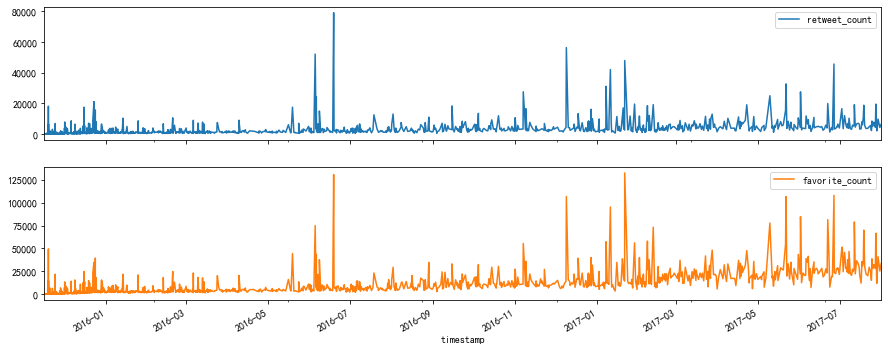

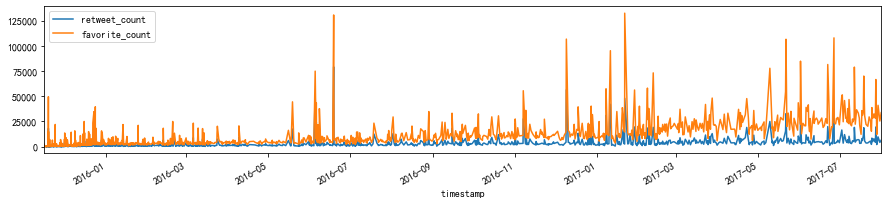

In [81]:
# 时间戳
retweet_favorite_df.plot(subplots = True, figsize = (15,6))
retweet_favorite_df.plot(y = ["retweet_count", "favorite_count"], figsize = (15,3));

/Users/martinzhou/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


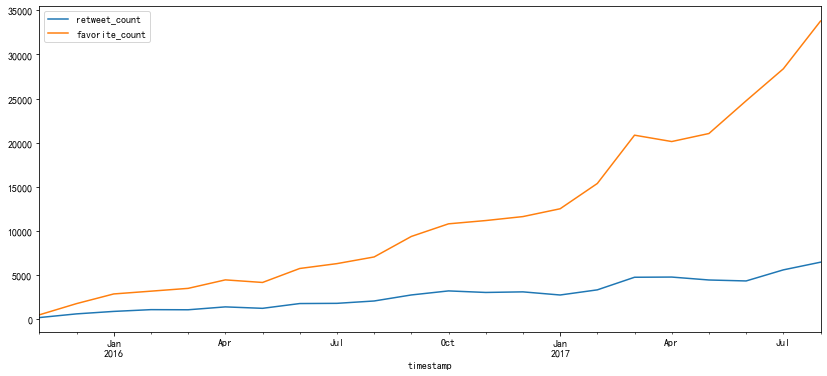

In [82]:
# 按照全部时间戳显示数据太过于密集
# 按月显示数据
retweet_favorite_df[["retweet_count", "favorite_count"]].resample("1m").median().plot(figsize = (14,6));

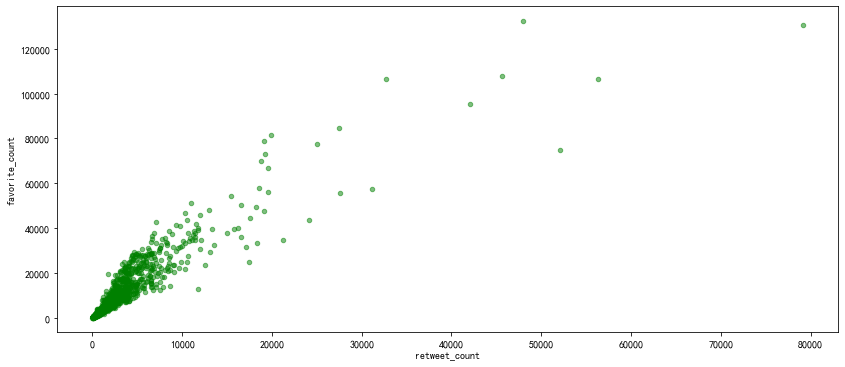

In [83]:
# 使用散点图说明转推量与喜爱量的相关性
retweet_favorite_df.plot.scatter(x = 'retweet_count', y = 'favorite_count', alpha = 0.5, color = 'green',figsize = (14,6));

## 5 结论
- pupper体型的宠物狗最受欢迎。
- 得分前三名的宠物狗分别为pomeranian（博美犬）、clumber（克伦博猎犬）、kuvasz（匈牙利库维斯犬）。
- 通过时间戳折线图，2016年4月以前喜爱量是转推量的两倍，之后喜爱量的增长速度明显高于转推量，推测导致这种现象的原因是喜爱比转推操作上更加方便。
- 通过散点图，转推数量在0-10000之间，转推数量与喜爱数量的相关性很强，转推数量超过20000后相关性越来越弱。

## 6 存在的问题
- 对三个数据集理解的不够透彻，有更多的数据关系可以挖掘。
- 宠物狗体型数据较少，结论可能不具有代表性。
- 得分高的宠物狗品种，由于只提取了算法对第一张图片的可信度数据，导致更高得分的宠物狗无法获取其品种信息。

> 提示：在完成 Notebook 的所有内容之后，还需要完成两篇文本和图片组成的 PDF 报告。因为这两篇报告中只是文字和图片，不需要包含代码，你可以使用文字编辑软件，比如 Word 来完成：
- 创建一个 300-600 字的书面报告，命名为 `wrangle_report.pdf`，在该报告中简要描述你的数据整理过程。这份报告可以看作是一份内部文档，供你的团队成员查看交流。
- 创建一个 250 字以上的书面报告，命名为 `act_report.pdf`，在该报告中，你可以与读者交流观点，展示你使用整理过的数据生成的可视化图表。这份报告可以看作是一份外部文档，如博客帖子或杂志文章。